## PREDICTING HOUSE SALES IN KING COUNTY USA

##### About Dataset
##### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
##### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


######  Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from fancyimpute import IterativeImputer

In [2]:
warnings.filterwarnings("ignore")

###### Reading the dataset

In [3]:
data = pd.read_csv("kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Data preprocesing

##### Lets change the datatype of the price column into int. 

In [6]:
data["price"] = data["price"].astype("int")

#### Id column has no importance here.We may also drop the date column.

In [7]:
data.drop(columns=["id", "date"], inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Checking for missing values present

In [8]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### Data set is free of any missing values. Lets check for ant duplicate entries.

In [9]:
data.duplicated().sum()

5

##### Lets drop the duplicated entries

In [10]:
data.drop_duplicates(inplace=True)

#### Explaratory Data Analysis

##### Histplots

<Figure size 720x576 with 0 Axes>

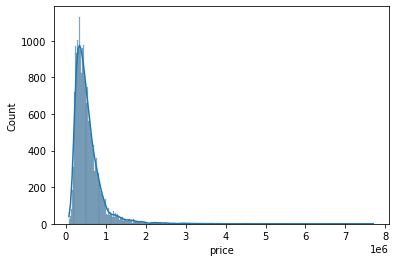

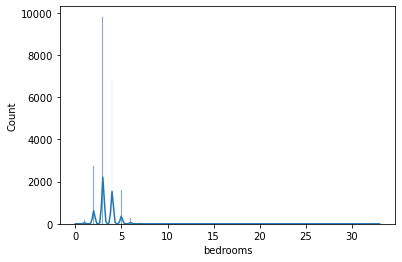

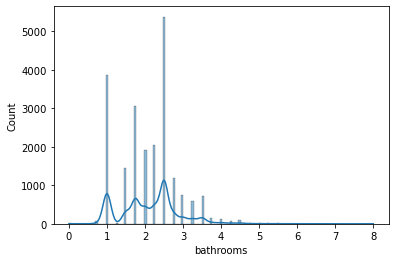

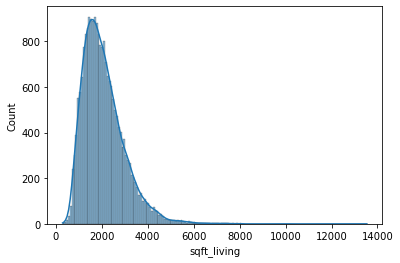

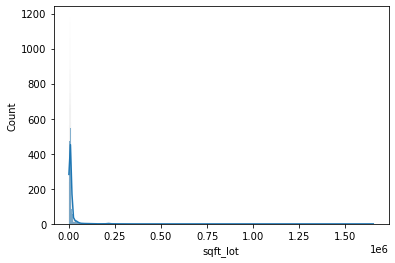

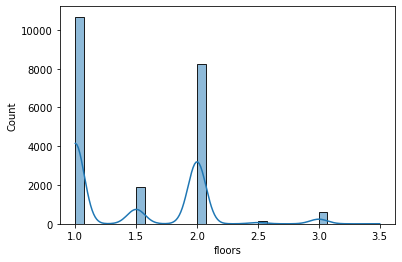

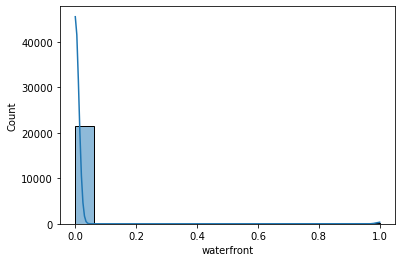

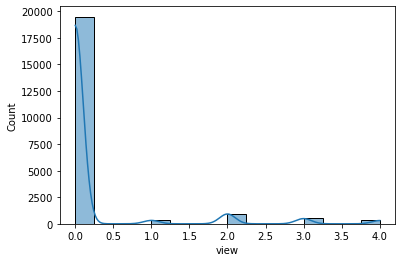

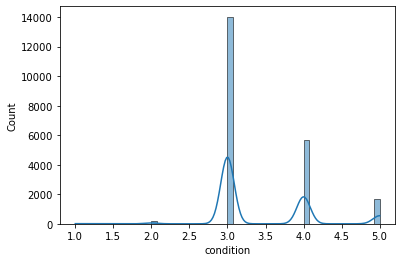

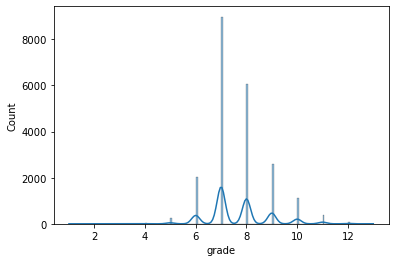

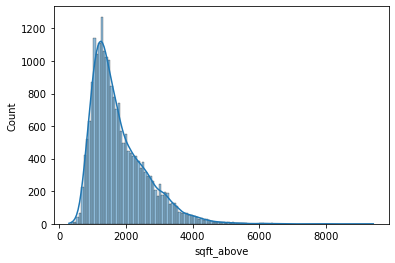

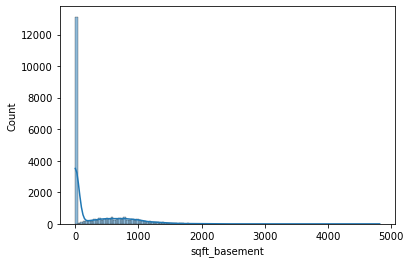

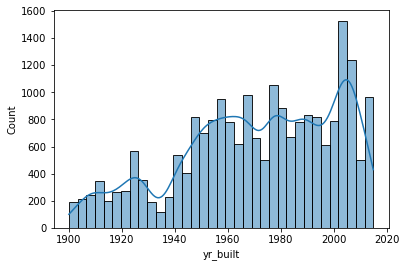

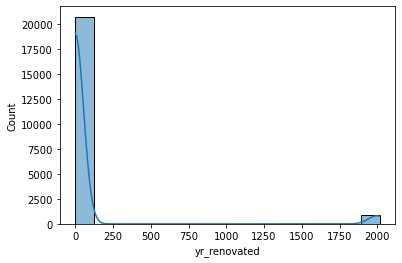

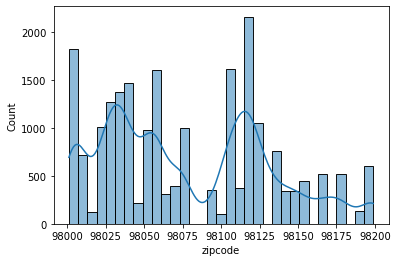

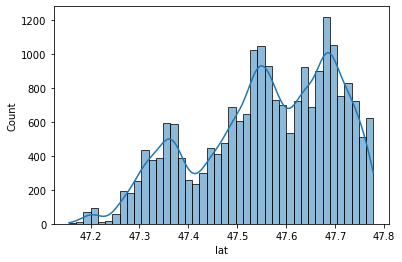

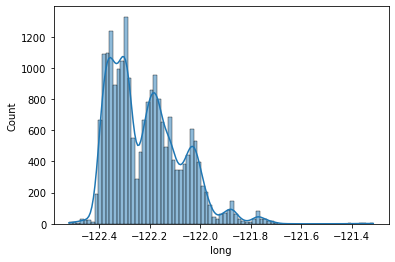

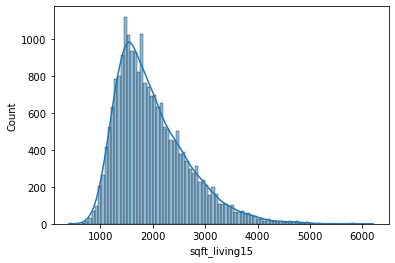

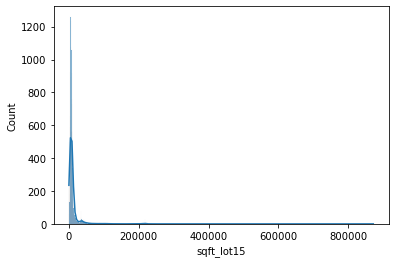

In [11]:
fig = plt.figure(figsize=(10,8), constrained_layout=True)
for i in data.columns:
    plt.show();
    sns.histplot(data=data, x=data[i], kde=True)

##### Comparing the price with various features:

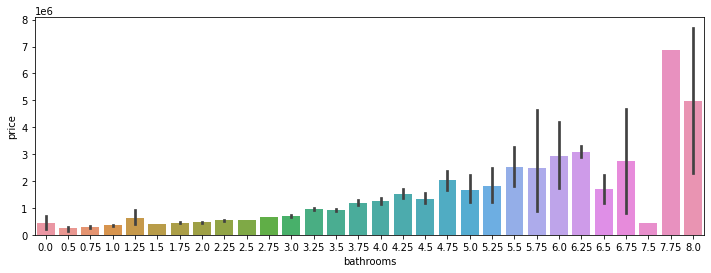

In [12]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.bathrooms, y=data.price, data=data)
plt.show();

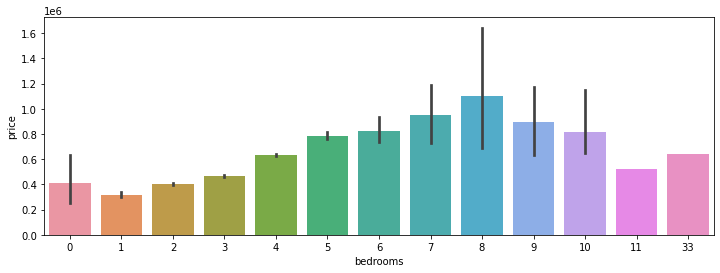

In [13]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.bedrooms, y=data.price, data=data)
plt.show();

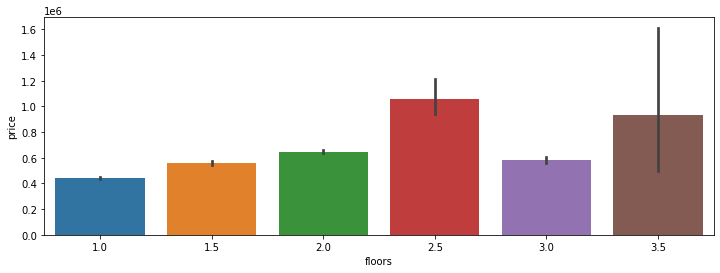

In [14]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.floors, y=data.price, data=data)
plt.show();

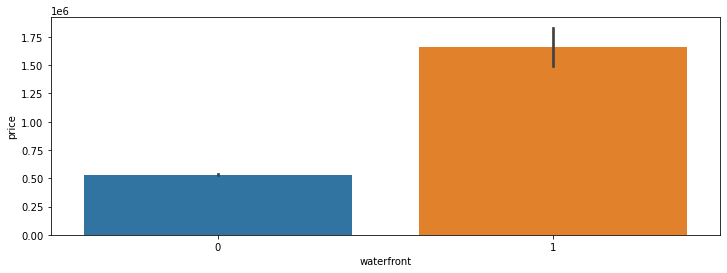

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.waterfront, y=data.price, data=data, order=data.waterfront.value_counts().index)
plt.show();

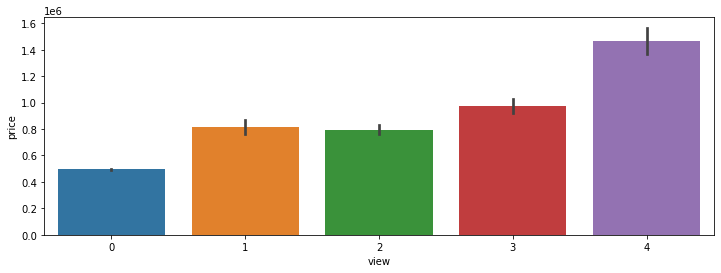

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.view, y=data.price, data=data)
plt.show();

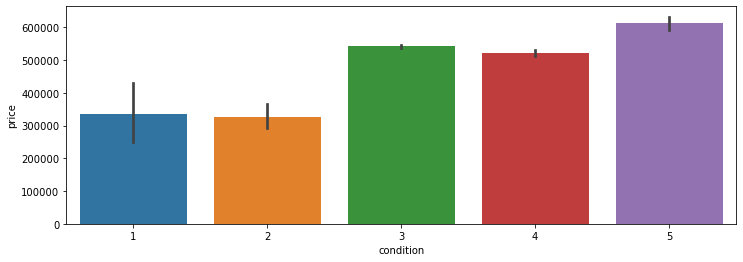

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.condition, y=data.price, data=data)
plt.show();

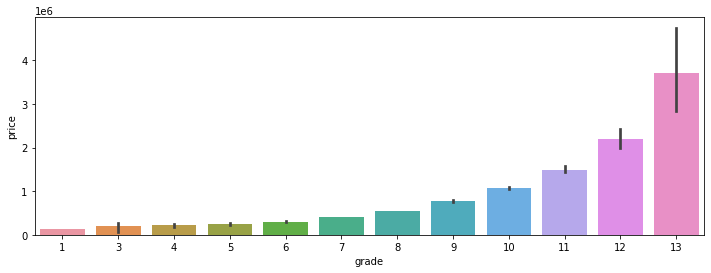

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(x=data.grade, y=data.price, data=data)
plt.show();

##### Lets check the correlation with the target variable "price".

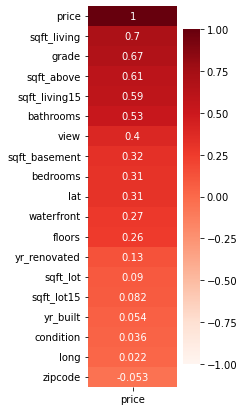

In [19]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')

#### We can see that only variable having strong correlation with "price" are columns sqft_living, grade, sqft_above, sqft_living15, and bathrooms. 

#### Pairplot between Target and High correlated variables

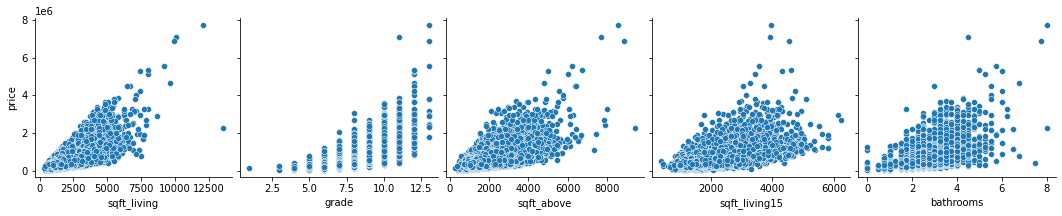

In [20]:
sns.pairplot(data,x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], y_vars=['price'], height=3, aspect=1)

##### Lets make a new data fram using the selected features.

In [21]:
data_new =data[["sqft_living", "grade", "sqft_above", "sqft_living15", "price"]]

In [22]:
data_new.head()

,sqft_living,grade,sqft_above,sqft_living15,price
0,1180,7,1180,1340,221900
1,2570,7,2170,1690,538000
2,770,6,770,2720,180000
3,1960,7,1050,1360,604000
4,1680,8,1680,1800,510000


##### Oulier treatment

##### Boxplot

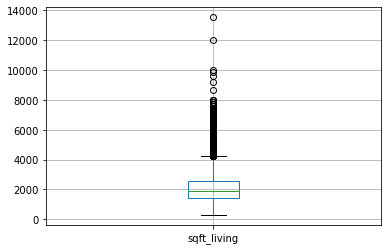

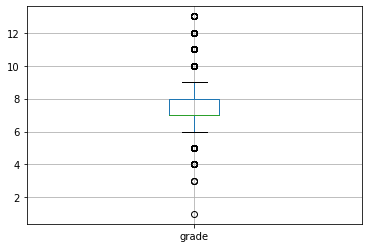

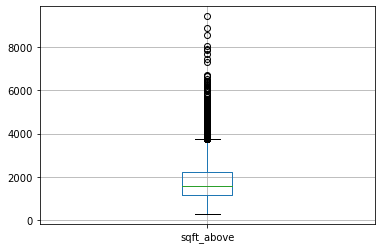

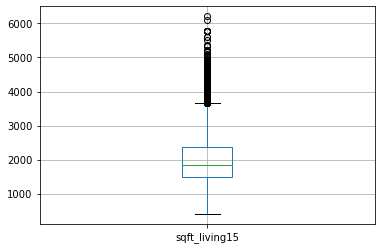

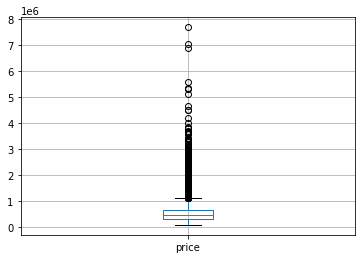

In [23]:
for column in data_new.columns:
    if data_new[column].dtype != "object":
        plt.figure()
        data_new.boxplot([column])

##### As we can see, that there are outliers . But most of the outliers are to near each other so we assume that this value of outliers is true (contains a good information) and we will keep all the data

##### Lets change the data types into integer.

In [24]:
for i in data_new.columns:
    data_new[i] = data_new[i].astype("int")

In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sqft_living    21608 non-null  int32
 1   grade          21608 non-null  int32
 2   sqft_above     21608 non-null  int32
 3   sqft_living15  21608 non-null  int32
 4   price          21608 non-null  int32
dtypes: int32(5)
memory usage: 1.1 MB


##### Splitting into training and testing data

In [26]:
x= data_new.iloc[:, :-1].values

In [27]:
y = data_new.iloc[:, -1].values

#### Scaling

In [28]:
sc = StandardScaler()

In [29]:
x = sc.fit_transform(x)

In [30]:
x.shape

(21608, 4)

In [31]:
y.shape

(21608,)

##### Splitting the data into Training and testing

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Model Building

In [33]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(n_jobs=-1)
}

In [34]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score = r2_score(y_test, model.predict(x_test))
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  0.5268776143073999
mae:  162287.75697963746
mse:  57477436674.7608
rmse:  239744.5237638616
****************************************************************************************************
model trained with Ridge
r2score:  0.5268808132559253
mae:  162286.2080520898
mse:  57477048049.3927
rmse:  239743.71326354463
****************************************************************************************************
model trained with LinearSVR
r2score:  -2.21395121714946
mae:  518611.0090540198
mse:  390447975293.0189
rmse:  624858.3641858521
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  0.16125622674817564
mae:  201914.65748532792
mse:  101895077407.63339
rmse:  319210.0834993052
****************************************************************************************************
model trained with GradientBoostingRegressor
r2score:  

#### We can see that GradientBoostingRegressor is having the best perfomance.

In [35]:
best_model = GradientBoostingRegressor().fit(x_train, y_train) 
y_pred = best_model.predict(x_test) 
Score = r2_score(y_test, y_pred) 
print("score before hyper parameter tuning{}".format(Score))

score before hyper parameter tuning0.6045845712210403


##### Lets try to boost the accuracy of the model by Hyper Parameter tuning

In [36]:
GBR = GradientBoostingRegressor()

In [37]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [38]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1) 

In [39]:
grid_GBR.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [40]:
grid_GBR.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.9}

##### Lets do predictions using the best parameters.

In [41]:
grid_GBR_tuned = GradientBoostingRegressor(learning_rate= 0.01, max_depth = 4, n_estimators = 500, subsample = 0.9) 

In [42]:
grid_GBR_tuned.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.9)

In [43]:
y_pred_gbr = grid_GBR_tuned.predict(x_test)

#### Score after Hyper parameter tuning

In [44]:
score = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
print("r2score: ",score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse: ", rmse)

r2score:  0.6069601806811405
mae:  147130.4764438974
mse:  47748578398.98762
rmse:  218514.48098235417


#### We have improved the score slightly. 

##### Saving the result into a seperate dataframe

In [45]:
predict = grid_GBR_tuned.predict(x)

In [46]:
price = data.price.values

In [47]:
PREDICT = pd.DataFrame(zip(price, predict), columns=("ACTUAL", "PREDICTION"))

In [48]:
PREDICT.head()

,ACTUAL,PREDICTION
0,221900,344973.738226
1,538000,521265.158882
2,180000,420809.241622
3,604000,399755.696559
4,510000,478068.335898
